In [0]:
import pandas as pd
import numpy as np
import timeit
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ipywidgets import interact


In [0]:
%matplotlib inline

In [0]:
def normalize(X):
    mu = np.mean(X, axis=0)     # Calculating the mean of X
    std = np.std(X, axis=0)     # Calculating the standard deviation of X
    std_filled = std.copy()
    std_filled[std==0] = 1.
    # Calculating the normalized data Xbar
    Xbar = (X - mu)/std_filled                 
    return Xbar, mu, std      


In [0]:
df2 = pd.read_csv("/content/GLC03122015_latest.csv", header='infer')      

X = df2.values
print(X.shape)          # Display dimension of X
Xbar, mu, std = normalize(X)    
print(Xbar.shape)       # Display dimension of normalized X
print(mu.shape)         
print(std.shape)        
print(np.trace(Xbar))

(2000, 11)
(2000, 11)
(11,)
(11,)
6.808539806485009


In [0]:
def eig_sorted(S):
    # Finding the eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(S)       
    # Sorting the eigenvalues and corresponding eigenvectors
    idx = eigvals.argsort()[::-1]   
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    return (eigvals, eigvecs) 

In [0]:
def eig_unsorted(S):
    # Finding the eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(S)       
    return (eigvals,eigvecs)

In [0]:
def projection_matrix(B):
    P = np.matmul(B,B.T)    # Computing the projection matrix
    return P 


In [0]:
def PCA_sorted(X, num_components):
    # Computing PCA on given input matrix for sorted eigenvalues
    Xbar,mu,std=normalize(X)
    covariance=np.matmul(Xbar.T,Xbar)
    S=covariance
    eigvals,eigvecs=eig_sorted(S)

    # To find the variance of eigenvalues
    eigenSum = eigvals[:num_components].sum()     
    
    B = np.stack(eigvecs[:,:num_components])
    P = projection_matrix(B)     # Compute projection matrix
    X_reconstruct=np.matmul(P,X.T)    # Reconstuct the X
    X_reconstruct=X_reconstruct.T
    return eigenSum, X_reconstruct 

In [0]:
def PCA_unsorted(X, num_components):
    # Computing PCA on given input matrix for unsorted eigenvalues
    Xbar,mu,std=normalize(X)
    covariance=np.matmul(Xbar.T,Xbar)
    S=covariance
    eigvals,eigvecs=eig_unsorted(S)
    B = np.stack(eigvecs[:,:num_components]) 
    P = projection_matrix(B)    # Compute projection matrix
    X_reconstruct=np.matmul(P,X.T)    # Reconstruct the X
    X_reconstruct=X_reconstruct.T
    return X_reconstruct 

In [0]:
covariance = np.matmul(Xbar.T,Xbar)
print(covariance.shape)
print(np.trace(covariance))
S = covariance

(11, 11)
22000.000000000022


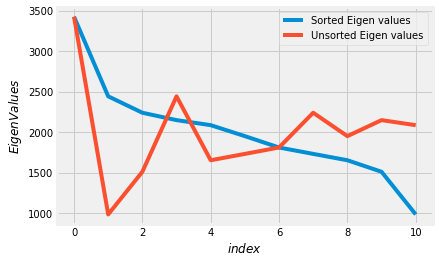

In [0]:
# Plotting sorted and unsorted eigenvalues against index
sorted_eigvals, sorted_eigvecs = eig_sorted(S)
unsorted_eigvals, unsorted_eigvecs = eig_unsorted(S)
plt.plot(sorted_eigvals, label = 'Sorted Eigen values')
plt.plot(unsorted_eigvals, label = 'Unsorted Eigen values')
plt.xlabel("$index$")
plt.ylabel("$EigenValues$")
plt.legend()

In [0]:
def mse(predict, actual):
    # Computing MSE
    return np.square(predict - actual).sum(axis=1).mean()

In [0]:
loss_1 = []
variance = []
reconstructions_1 = []
# iterating over different numbers of principal components, and finding the MSE for sorted eigenvalues
for num_component in range(1, 14):
    eigenSum, reconst_1 = PCA_sorted(Xbar, num_component)
    error_1 = mse(reconst_1, Xbar)      # Computing MSE
    reconstructions_1.append(reconst_1)
    variance.append((num_component, eigenSum))
    loss_1.append((num_component, error_1))

reconstructions_1 = np.asarray(reconstructions_1)
reconstructions_1 = reconstructions_1 * std + mu # "unnormalize" the reconstructed data
loss_1 = np.asarray(loss_1)

variance = np.asarray(variance)

In [0]:
loss_2 = []
reconstructions_2 = []
# iterate over different numbers of principal components, and finding the MSE for unsorted eigenvalues
for num_component in range(1, 14):
    reconst_2 = PCA_unsorted(Xbar, num_component)
    error_2 = mse(reconst_2, Xbar)   # Computing MSE
    reconstructions_2.append(reconst_2)
    loss_2.append((num_component, error_2))

reconstructions_2 = np.asarray(reconstructions_2)
reconstructions_2 = reconstructions_2 * std + mu # "unnormalize" the reconstructed image
loss_2 = np.asarray(loss_2)

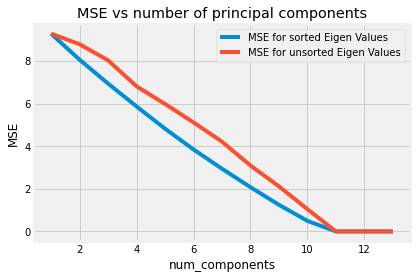

In [0]:
# Plotting the MSE of sorted and unsorted eigenvalues against number of principal components
fig, ax = plt.subplots()
ax.plot(loss_1[:,0], loss_1[:,1], label = 'MSE for sorted Eigen Values');
ax.plot(loss_2[:,0], loss_2[:,1], label = 'MSE for unsorted Eigen Values');
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');
plt.legend()



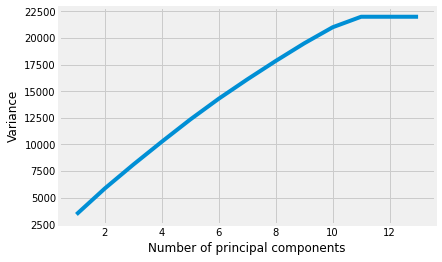

In [0]:
# Plotting graph of variance against number of principal components
plt.plot(variance[:,0], variance[:,1])
plt.xlabel("Number of principal components")
plt.ylabel("Variance");

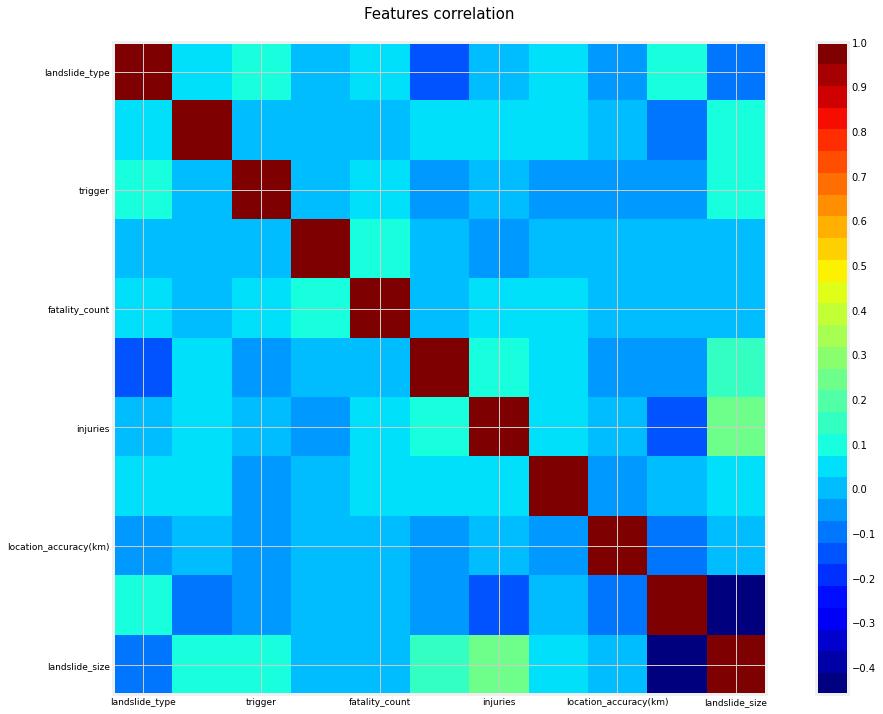

In [0]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df2.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df2)

In [0]:
def time(f, repeat=10):
    times = []
    for _ in range(repeat):
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop-start)
    return np.mean(times), np.std(times)

In [0]:
times_mm0 = []
times_mm1 = []

# iterate over datasets of different size
for datasetsize in np.arange(4, 784, step=20):
    XX = Xbar[:datasetsize] # select the first `datasetsize` samples in the dataset
    # record the running time for computing X.T @ X
    mu, sigma = time(lambda : XX.T @ XX)
    times_mm0.append((datasetsize, mu, sigma))
    
    # record the running time for computing X @ X.T
    mu, sigma = time(lambda : XX @ XX.T)
    times_mm1.append((datasetsize, mu, sigma))
    
times_mm0 = np.asarray(times_mm0)
times_mm1 = np.asarray(times_mm1)

Having recorded the running time for computing `X @ X.T` and `X @ X.T`, we can plot them.

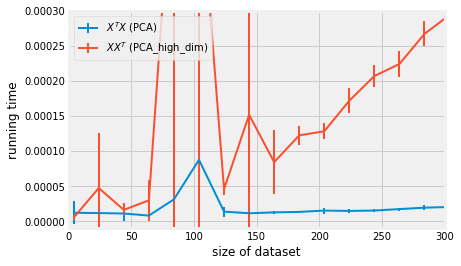

In [0]:
fig, ax = plt.subplots()
ax.set(xlabel='size of dataset', ylabel='running time')
bar1 = ax.errorbar(times_mm0[:, 0], times_mm0[:, 1], times_mm0[:, 2], label="$X^T X$ (PCA)", linewidth=2)
bar2 = ax.errorbar(times_mm1[:, 0], times_mm1[:, 1], times_mm1[:, 2], label="$X X^T$ (PCA_high_dim)", linewidth=2)
plt.ylim(-0.00001,0.0003)
plt.xlim(0,300)
ax.legend();